In [1]:
# This allows us to update modules without having to restart the entire kernel
%load_ext autoreload
%autoreload 2

### Visualizations

We mainly want to make sure our visualizations of the data look like they come from 

the same data distribution, so we may need to apply different transforms to the 

different datasets to ensure the look like they all came from the same dataset.

-

For example, one dataset may have all the faces perfectly centered and staring at the

camera while another dataset may have the faces misaligned and the faces may not be 

looking at the camera. From that, we may accidentally learn to classify based on these

distribution shifts instead of classifying on the actual images.

In [2]:
import torch
from torch.utils.data import DataLoader, Subset
import torchvision.transforms.v2 as v2
from displayUtils import displayImageGrid
from datasets import LFWDataset, RealVsFake140k, RealVsFake2k

transform = v2.Compose([
    v2.Resize((224, 224)),  # Resize images to fit Swin Transformer input dimensions
    v2.ToImage(), 
    v2.ToDtype(torch.float32, scale=True)]
)


def visualizeSamples(dataLoader: DataLoader, BATCH_SIZE=64, H=8, W=8, title=''):
    
    features, labels = next(iter(dataLoader))
    features: torch.Tensor
    labels: torch.Tensor

    # Do the tensor shuffle
    featuresArray = features.numpy().transpose(2, 3, 1, 0)
    labelsList = list(labels.numpy())

    displayImageGrid([featuresArray[..., idx] for idx in range(BATCH_SIZE)], H=H, W=W, figsize=(10, 12), title=title, labels=labelsList)

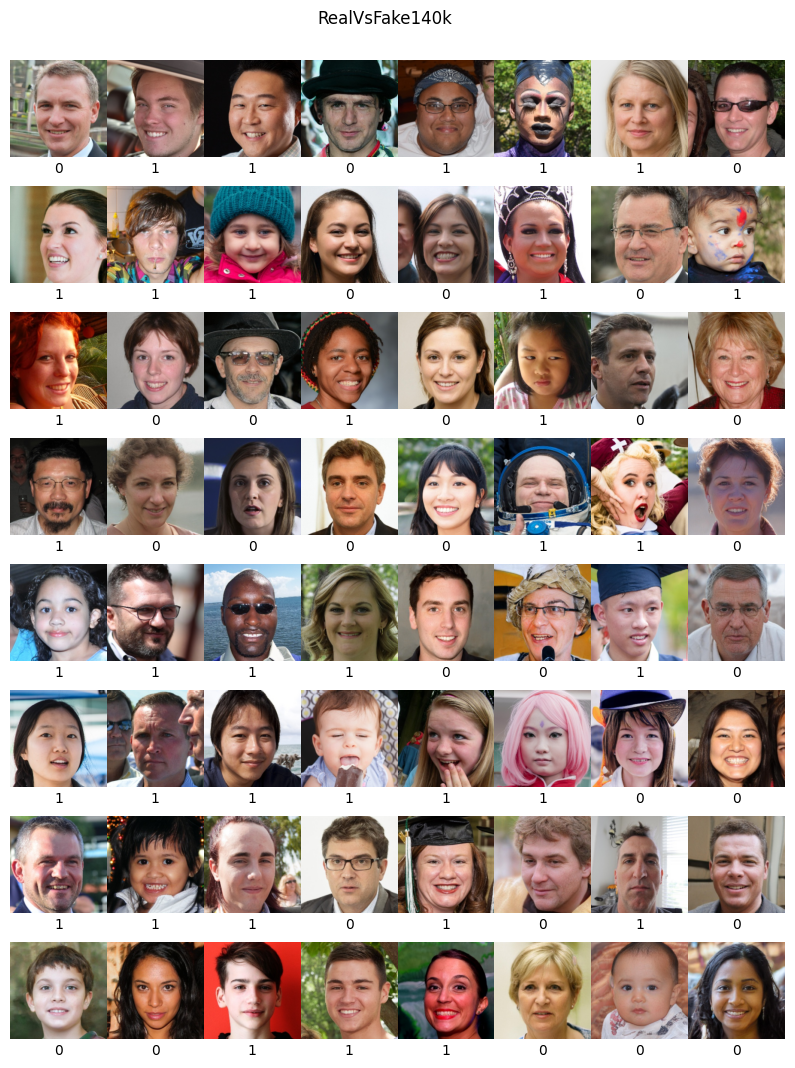

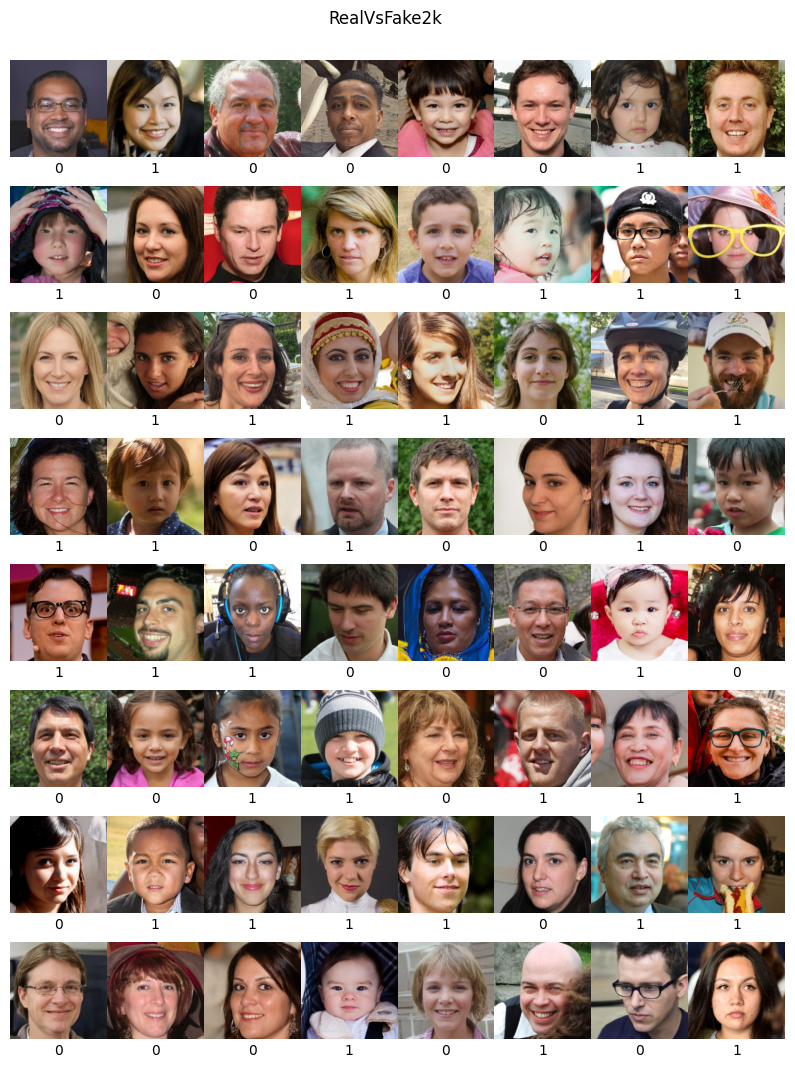

In [3]:
BATCH_SIZE = 64
lfw = LFWDataset(transform=transform)
realVsFake140k = RealVsFake140k(transform=transform)
realVsFake2k = RealVsFake140k(transform=transform)

lfwDataLoader = DataLoader(lfw, batch_size=BATCH_SIZE, shuffle=True)
realVsFake140kDataLoader = DataLoader(realVsFake140k, batch_size=BATCH_SIZE, shuffle=True)
realVsFake2kDataLoader = DataLoader(realVsFake2k, batch_size=BATCH_SIZE, shuffle=True)

visualizeSamples(lfwDataLoader, title='LFW Dataset')
visualizeSamples(realVsFake140kDataLoader, title='RealVsFake140k')
visualizeSamples(realVsFake2kDataLoader, title='RealVsFake2k')

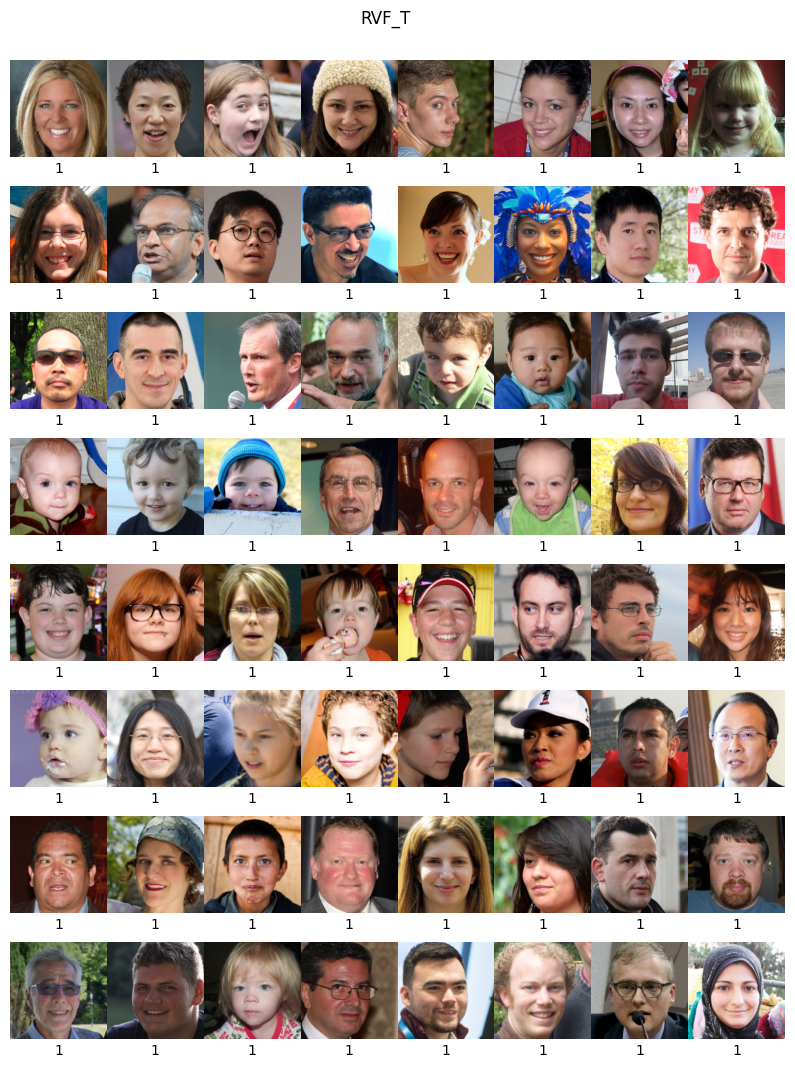

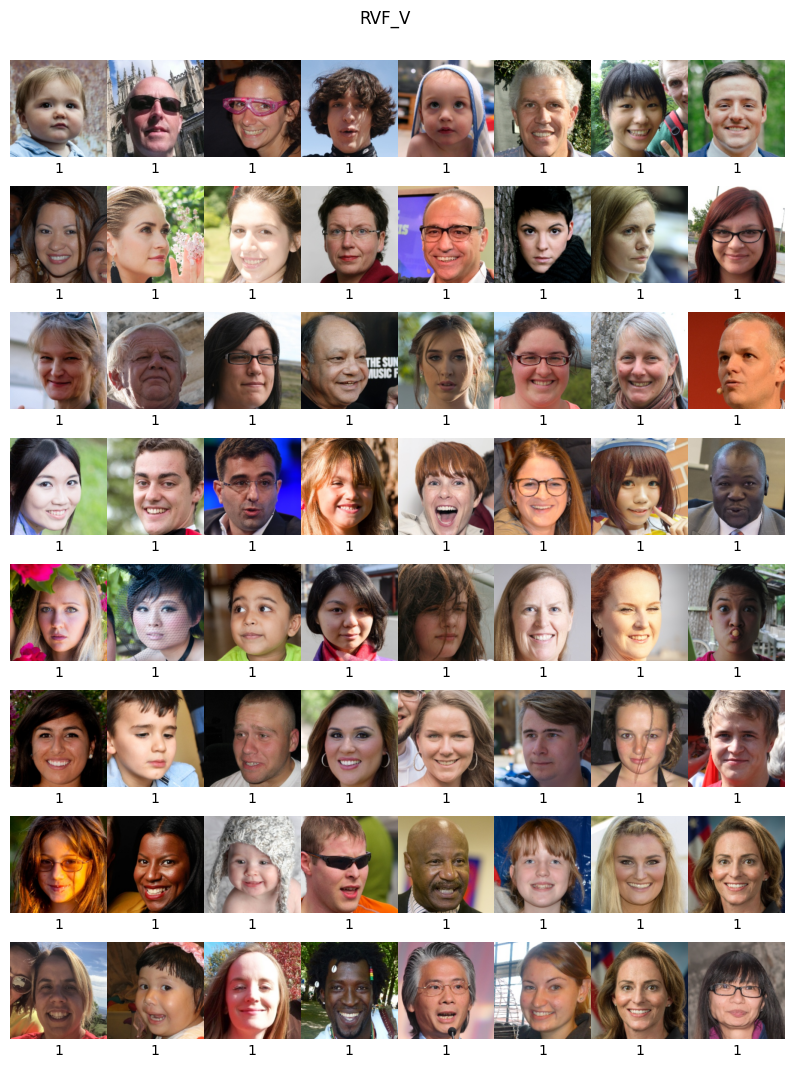

In [5]:
trainset = RealVsFake140k(transform=transform, split='train')
valset =  RealVsFake140k(transform=transform, split='valid')

trainset = Subset(trainset, indices=torch.randint(40000, 49999, (64,)))
valset = Subset(valset, indices=torch.randint(0, 9999, (64,)))

# Dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
valLoader = torch.utils.data.DataLoader(valset, batch_size=BATCH_SIZE, shuffle=False)

visualizeSamples(trainloader, title='RVF_T')
visualizeSamples(valLoader, title='RVF_V')
